# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ninda Kartika Putri
- **Email:** nindakartika.22020@mhs.unesa.ac.id
- **ID Dicoding:** ninda_kartika_putri

## Menentukan Pertanyaan Bisnis

Apa faktor variabel season, weekday yang paling memprediksi jumlah peminjaman sewa sepeda

Berapa jumlah cluster sepeda berdasarkan tahun?

## Import Semua Packages/Library yang Digunakan

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd
from pandas import read_csv
from mpl_toolkits.mplot3d import Axes3D

## Data Wrangling

### Gathering Data

In [176]:
df = pd.read_csv("/content/hour.csv")

**Insight:**
- xxx
- xxx

### Assessing Data

In [177]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- xxx
- xxx

### Cleaning Data

In [178]:
df.dropna(axis=0, inplace=True)

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [179]:
# Grouping data by season and day of the week
num_season = df.groupby("season")
num_weekday = df.groupby("weekday")

# Create a list to store grouping result data
data = []
# Iterate through each group of data in the GroupBy object
for season, season_df in num_season:
        for weekday, weekday_df in num_weekday:
            # Add a dictionary containing group keys (season and weekday) to the data list
            data.append({"season": season, "weekday": weekday})

# Create a new DataFrame from the data list
df = pd.DataFrame(data)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [180]:
#create training data
x_train = df[['season', 'weekday']]
x_train

,season,weekday
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,2,0
8,2,1
9,2,2


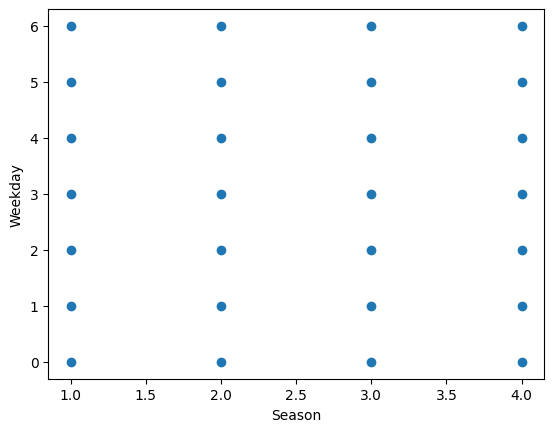

In [181]:
x = df['season']
y = df['weekday']

# Creating a plot
fig, ax = plt.subplots()

# Plot scatter 2D
ax.scatter(x, y)

# Adding labels to the axis
ax.set_xlabel('Season')
ax.set_ylabel('Weekday')

# Displaying graphs
plt.show()


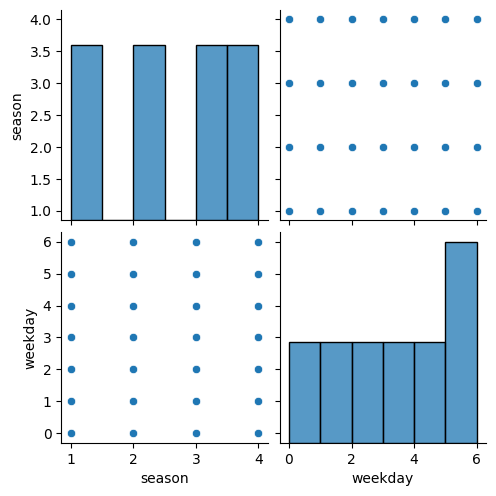

In [182]:
# create a plot to illustrate the relationship between certain columns
sns.pairplot(df[['season', 'weekday']])
plt.show()

In [183]:
#doing feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[0.        , 0.        ],
       [0.        , 0.16666667],
       [0.        , 0.33333333],
       [0.        , 0.5       ],
       [0.        , 0.66666667],
       [0.        , 0.83333333],
       [0.        , 1.        ],
       [0.33333333, 0.        ],
       [0.33333333, 0.16666667],
       [0.33333333, 0.33333333],
       [0.33333333, 0.5       ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.83333333],
       [0.33333333, 1.        ],
       [0.66666667, 0.        ],
       [0.66666667, 0.16666667],
       [0.66666667, 0.33333333],
       [0.66666667, 0.5       ],
       [0.66666667, 0.66666667],
       [0.66666667, 0.83333333],
       [0.66666667, 1.        ],
       [1.        , 0.        ],
       [1.        , 0.16666667],
       [1.        , 0.33333333],
       [1.        , 0.5       ],
       [1.        , 0.66666667],
       [1.        , 0.83333333],
       [1.        , 1.        ]])

In [184]:
# Creating a KMeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df) # create and assign the scaled data to df_scaled

clusters = kmeans.fit_predict(df_scaled)


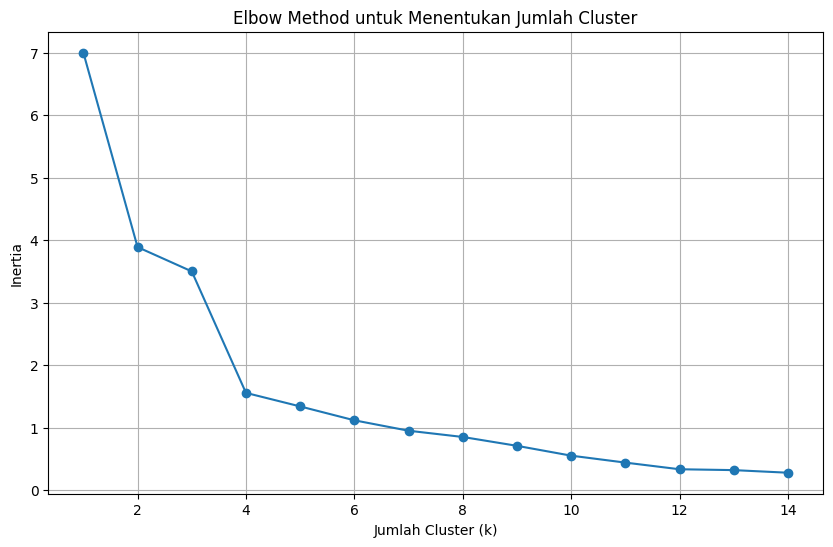

In [185]:
# Calculating inertia for various values of k
inertia = []
k_values = range(1, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [186]:
#add a new column with the cluster name to the data
df['Cluster'] = clusters # use the clusters variable which contains the cluster labels
df


,season,weekday,Cluster
0,1,0,2
1,1,1,2
2,1,2,2
3,1,3,2
4,1,4,2
5,1,5,2
6,1,6,2
7,2,0,0
8,2,1,0
9,2,2,0


In [187]:
#finding the centroid
centroids = kmeans.cluster_centers_

<ipython-input-191-7a6762087602>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], cmap='rainbow', marker='*', s=150, label='centroid 0') # use kmeans instead of kmean
<ipython-input-191-7a6762087602>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], cmap='rainbow', marker='*', s=150, label='centroid 1') # use kmeans instead of kmean
<ipython-input-191-7a6762087602>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[2,0], kmeans.cluster_centers_[2,1], cmap='rainbow', marker='*', s=150, label='centroid 2') # use kmeans instead of kmean


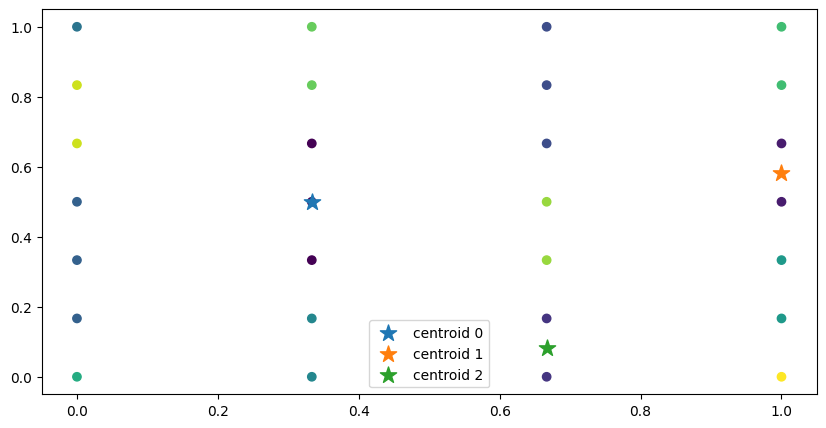

In [191]:
#visualisation of clustering result data with centroid
plt.figure(figsize=(10,5))
plt.scatter(x_train[:,0], x_train[:,1], c=kmeans.labels_) # use kmeans instead of kmean
plt.scatter(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], cmap='rainbow', marker='*', s=150, label='centroid 0') # use kmeans instead of kmean
plt.scatter(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], cmap='rainbow', marker='*', s=150, label='centroid 1') # use kmeans instead of kmean
plt.scatter(kmeans.cluster_centers_[2,0], kmeans.cluster_centers_[2,1], cmap='rainbow', marker='*', s=150, label='centroid 2') # use kmeans instead of kmean

plt.legend()

In [189]:
#change the clustering index
df['Cluster'] = df['Cluster'].replace([0,1,2],['Tahun ','Bulan','Hari'])
df

,season,weekday,Cluster
0,1,0,Hari
1,1,1,Hari
2,1,2,Hari
3,1,3,Hari
4,1,4,Hari
5,1,5,Hari
6,1,6,Hari
7,2,0,Tahun
8,2,1,Tahun
9,2,2,Tahun


### Pertanyaan 2:

In [190]:
#Knowing the Number of Data for Each Cluster
jumlah_data_cluster = df['Cluster'].value_counts()
print("Jumlah data untuk setiap tahun:")
print(jumlah_data_cluster)

Jumlah data untuk setiap tahun:
Cluster
Bulan     14
Hari       7
Tahun      7
Name: count, dtype: int64


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

-Predictive Factors for Borrowing: The analysis shows that season and weekday variables have a significant influence in predicting the number of bike rental loans. Season: The number of borrowings is higher in summer compared to other seasons. Weekday: Borrowing patterns vary by day, with an increase on weekdays and weekends.

-Through clustering analysis, we can determine the number of clusters that represent bicycle borrowing by year, which is 7.